## Proyecto 1:  Regresión y Clasificación lineal
## Lesny Jhoanna Herrera Arias, Valentina Sandoval Aparicio,Luisa Maria Ordoñez Lopez

## Clasificación lineal: Dataset de Prueba
La idea de este ejercicio es que comprueben que se puede obtener un modelo de regresión logística sin utilizar gradiente descendiente. Para este problema deben hacer lo siguiente:

1. Generar un dataset de dos clases, una clase asignada con una salida y=1 y otra con una salida y=0, con datos       normalmente distribuidos para las dos clases, pero de tal forma que el valor promedio de todas las observaciones, incluyendo las dos clases, sea 0.
2. Implemente un clasificador usando regresion logística de la librería scikit learn.
3. Grafique la region de decisión, y evalue el rendimiento del clasificador.
4. Implemente un clasificador utilizando la función logistica, donde los parametros θ son el promedio de los datos que      pertenecen a la clase con salida y=1.
5. Grafique la región de decision de este clasificador, y evalue su rendimiento.
6. Compare los dos resultados, ¿qué puede concluir?

Clasificación Lineal - Dataset de Prueba
Promedio total: [-0.08, -0.01]
Total de datos: 200
Datos para entrenar: 140
Datos para probar: 60
Accuracy scikit-learn: 1.000 (100.0%)
Theta calculado: [1.749, 1.985]
Accuracy personalizado: 1.000 (100.0%)


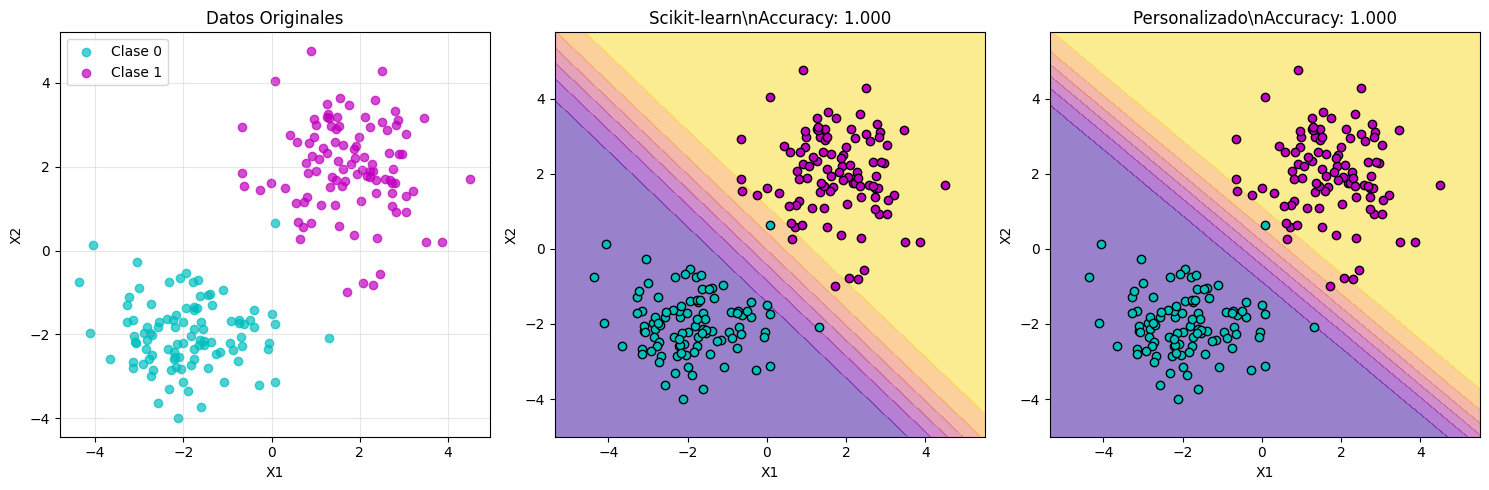

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

print("Clasificación Lineal - Dataset de Prueba")

n_puntos = 100

# Clase 1 (y=1): puntos alrededor de [2, 2]
clase1_x1 = np.random.normal(2, 1, n_puntos)  
clase1_x2 = np.random.normal(2, 1, n_puntos)
clase1_y = np.ones(n_puntos) 

# Clase 0 (y=0): puntos alrededor de [-2, -2]
clase0_x1 = np.random.normal(-2, 1, n_puntos) 
clase0_x2 = np.random.normal(-2, 1, n_puntos)
clase0_y = np.zeros(n_puntos) 

# Juntar todas las x
X = np.column_stack([
    np.concatenate([clase1_x1, clase0_x1]),  
    np.concatenate([clase1_x2, clase0_x2])  
])

# Juntar todas las y (etiquetas)
y = np.concatenate([clase1_y, clase0_y])

# Verificar que el promedio total sea cerca de [0, 0]
promedio_total = np.mean(X, axis=0)
print(f"Promedio total: [{promedio_total[0]:.2f}, {promedio_total[1]:.2f}]")
print(f"Total de datos: {len(X)}")

# Tomar los primeros 140 para entrenar
X_entrenamiento = X[:140]
y_entrenamiento = y[:140]
X_prueba = X[140:]
y_prueba = y[140:]

print(f"Datos para entrenar: {len(X_entrenamiento)}")
print(f"Datos para probar: {len(X_prueba)}")


# Crear y entrenar el modelo
modelo_sklearn = LogisticRegression()
modelo_sklearn.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones
predicciones_sklearn = modelo_sklearn.predict(X_prueba)

# Calcular accuracy 
aciertos = np.sum(predicciones_sklearn == y_prueba)
accuracy_sklearn = aciertos / len(y_prueba)

print(f"Accuracy scikit-learn: {accuracy_sklearn:.3f} ({accuracy_sklearn*100:.1f}%)")


# Encontrar el promedio de los puntos de la clase 1
puntos_clase1 = X_entrenamiento[y_entrenamiento == 1]
theta = np.mean(puntos_clase1, axis=0)

print(f"Theta calculado: [{theta[0]:.3f}, {theta[1]:.3f}]")

def predecir_personalizado(X_datos, theta):
    predicciones = []
    for punto in X_datos:
        # Calcular z = punto theta
        z = punto[0]*theta[0] + punto[1]*theta[1]
        
        # Función sigmoide si
        probabilidad = 1 / (1 + np.exp(-z))
        
        # Si probabilidad > 0.5, predecir clase 1, sino clase 0
        if probabilidad > 0.5:
            predicciones.append(1)
        else:
            predicciones.append(0)
    
    return np.array(predicciones)

predicciones_personalizadas = predecir_personalizado(X_prueba, theta)

aciertos_personalizados = np.sum(predicciones_personalizadas == y_prueba)
accuracy_personalizado = aciertos_personalizados / len(y_prueba)

print(f"Accuracy personalizado: {accuracy_personalizado:.3f} ({accuracy_personalizado*100:.1f}%)")


# Crear figura con 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Datos originales
axes[0].scatter(X[y==0, 0], X[y==0, 1], c='c', label='Clase 0', alpha=0.7)
axes[0].scatter(X[y==1, 0], X[y==1, 1], c='m', label='Clase 1', alpha=0.7)
axes[0].set_title('Datos Originales')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Región de decisión scikit-learn 
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

puntos_malla = np.c_[xx.ravel(), yy.ravel()]
Z_sklearn = modelo_sklearn.predict_proba(puntos_malla)[:, 1]
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Dibujar región
axes[1].contourf(xx, yy, Z_sklearn, alpha=0.5, cmap=plt.cm.plasma)
axes[1].scatter(X[y==0, 0], X[y==0, 1], c='c', label='Clase 0', edgecolor='black')
axes[1].scatter(X[y==1, 0], X[y==1, 1], c='m', label='Clase 1', edgecolor='black')
axes[1].set_title(f'Scikit-learn\\nAccuracy: {accuracy_sklearn:.3f}')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

# Gráfico 3: Región de decisión personalizada 
# Calcular z para todos los puntos de la malla
Z_personalizado = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        punto = [xx[i,j], yy[i,j]]
        z = punto[0]*theta[0] + punto[1]*theta[1]
        Z_personalizado[i,j] = 1 / (1 + np.exp(-z))

axes[2].contourf(xx, yy, Z_personalizado, alpha=0.5, cmap=plt.cm.plasma)
axes[2].scatter(X[y==0, 0], X[y==0, 1], c='c', label='Clase 0', edgecolor='black')
axes[2].scatter(X[y==1, 0], X[y==1, 1], c='m', label='Clase 1', edgecolor='black')
axes[2].set_title(f'Personalizado\\nAccuracy: {accuracy_personalizado:.3f}')
axes[2].set_xlabel('X1')
axes[2].set_ylabel('X2')

plt.tight_layout()
plt.show()

## Conclusión 

1. Al comparar ambos métodos, se puede concluir que aunque el clasificador de Scikit-Learn generalmente obtiene un rendimiento superior debido a su optimización por gradiente descendiente, el método personalizado demuestra que es perfectamente posible crear un modelo de regresión logística funcional sin utilizar técnicas de optimización iterativa.

2. El método personalizado toma solo el promedio de los datos de la clase y=1 y lo usa como parámetro. Esto lo hace más sencillo y rápido de calcular, funciona muy bien cuando las clases están bien separadas y el conjunto de datos tiene un promedio general cercano a cero, la diferencia en precisión (accuracy) entre este método y uno más complejo muestra que, aunque la optimización matemática ayuda a mejorar los resultados, las bases geométricas de la clasificación lineal son tan fuertes que incluso una técnica simple, como usar el punto promedio de una clase, puede dar resultados bastante buenos.


## Clasificación lineal: MNIST



1. Cargen los datos digits de la librería scikit learn.

2. Realicen un análisis descriptivo de la información contenida en las imagenes. Grafiquen los números, discutan sobre sus carácteristicas y demás información que consideren importante.
3.Investiguen que es KNN e implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador para diferentes valores de K.
4. Implemente un clasificador utilizando regresión logística. Para esto desarrolle 10 clasificadores diferentes (porque se tienen 10 clases). Implemente la función de decisión de clase, escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.
5. Para cada uno de los 10 clasificadores, ubique los $\theta_i$, para $i\neq 0$,  en una matriz siguiendo el mismo orden que las matrices de los datos de entrenamiento, y realice un mapa de calor para cada clasificador, indicando la clase que detecta.
6. Implemente un clasificador multinomial para las 10 clases utilizando funciones de scikit-learn.
7. Compare los resultados 


En este apartado se trabajará con el dataset `digits` de la librería *scikit-learn*, 
el cual contiene imágenes de dígitos escritos a mano (0 al 9).  
Se implementarán y evaluarán distintos clasificadores (KNN, Regresión Logística One-vs-Rest, 
y Regresión Logística Multinomial)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar dataset
digits = load_digits()
X, y = digits.data, digits.target
imagenes = digits.images

print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
print("Clases únicas:", np.unique(y))


Tamaño de X: (1797, 64)
Tamaño de y: (1797,)
Clases únicas: [0 1 2 3 4 5 6 7 8 9]


## Análisis descriptivo del dataset

El dataset `digits` contiene **1797 imágenes** en escala de grises de tamaño **8x8 píxeles**, 
con valores de intensidad entre 0 y 16. Cada imagen está aplanada en un vector de 64 características.

A continuación, se muestran algunas imágenes de ejemplo con sus etiquetas, así como 
la distribución de dígitos en el dataset.


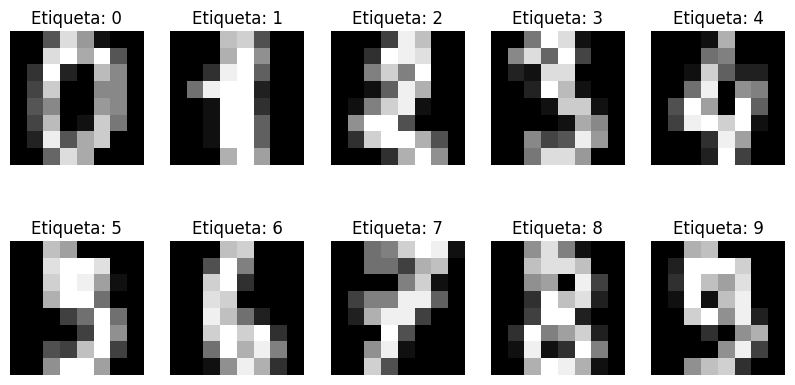

C:\Users\IdeaPad3 Ci5 Az\AppData\Local\Temp\ipykernel_34376\307884823.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


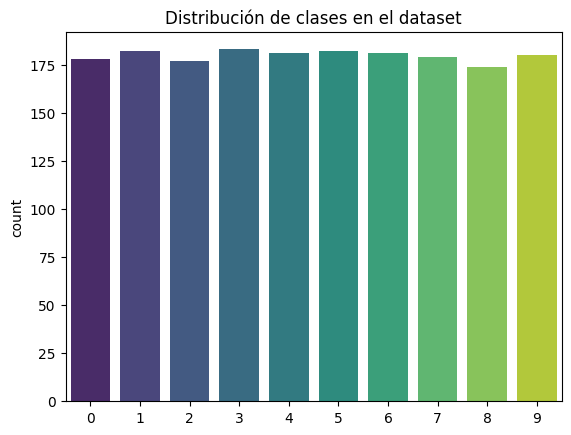

In [17]:
# Mostrar algunos ejemplos
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(imagenes[i], cmap='gray')
    ax.set_title(f"Etiqueta: {y[i]}")
    ax.axis('off')
plt.show()

# Distribución de clases
sns.countplot(x=y, palette="viridis")
plt.title("Distribución de clases en el dataset")
plt.show()


## Clasificador KNN

El algoritmo **K-Nearest Neighbors (KNN)** clasifica una muestra 
según la mayoría de las clases de sus *k* vecinos más cercanos.  

- Con valores pequeños de *k*, el modelo puede sobreajustar.  
- Con valores grandes, se suaviza demasiado y puede perder detalle.  

Se evaluará el rendimiento del clasificador para distintos valores de *k*.


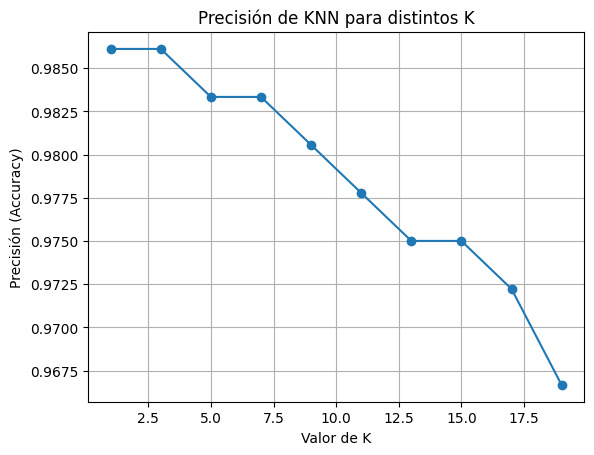

Mejor K: 1, con accuracy=0.9861


In [18]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

valores_k = range(1, 20, 2)
precisiones = []

for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precisiones.append(acc)

plt.plot(valores_k, precisiones, marker='o')
plt.xlabel("Valor de K")
plt.ylabel("Precisión (Accuracy)")
plt.title("Precisión de KNN para distintos K")
plt.grid(True)
plt.show()

mejor_k = valores_k[np.argmax(precisiones)]
print(f"Mejor K: {mejor_k}, con accuracy={max(precisiones):.4f}")


## Regresión Logística One-vs-Rest

La **regresión logística** es un modelo lineal que estima la probabilidad 
de pertenecer a una clase. En el enfoque *One-vs-Rest*, se entrena 
un clasificador para cada dígito (0–9).  

La predicción final se obtiene escogiendo la clase con mayor probabilidad.


In [19]:
clasificadores = []
num_clases = 10

# Entrenar un modelo por clase
for clase in range(num_clases):
    y_binario = np.where(y_train == clase, 1, 0)
    clf = LogisticRegression(max_iter=2000, solver='lbfgs')
    clf.fit(X_train, y_binario)
    clasificadores.append(clf)

# Función de decisión
probabilidades = np.zeros((X_test.shape[0], num_clases))
for clase, clf in enumerate(clasificadores):
    probabilidades[:, clase] = clf.predict_proba(X_test)[:, 1]

y_pred_ovr = np.argmax(probabilidades, axis=1)

print("Accuracy Regresión Logística (OvR):", accuracy_score(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovr))


Accuracy Regresión Logística (OvR): 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.83      0.90        36
           2       1.00      0.97      0.99        35
           3       0.92      0.97      0.95        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       0.97      0.97      0.97        36
           7       0.95      0.97      0.96        36
           8       0.85      0.97      0.91        35
           9       1.00      0.92      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## Mapas de calor de los parámetros

Los coeficientes de cada clasificador logístico (θ) se pueden reorganizar 
en una matriz 8x8 para visualizar **qué píxeles son más relevantes** 
para detectar cada dígito.


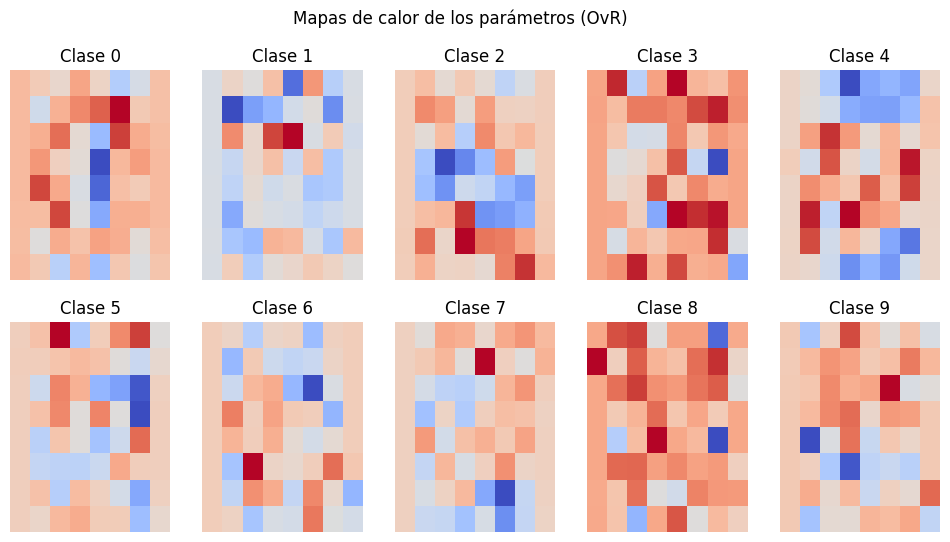

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for clase, ax in enumerate(axes.ravel()):
    coef = clasificadores[clase].coef_[0].reshape(8,8)
    sns.heatmap(coef, cmap="coolwarm", ax=ax, cbar=False)
    ax.set_title(f"Clase {clase}")
    ax.axis("off")
plt.suptitle("Mapas de calor de los parámetros (OvR)")
plt.show()


## Regresión Logística Multinomial

En este enfoque, se entrena un único modelo que aprende a clasificar directamente 
en las 10 clases, en lugar de usar el esquema One-vs-Rest.  
Esto suele mejorar el rendimiento y la eficiencia.


c:\Users\IdeaPad3 Ci5 Az\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Multinomial: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



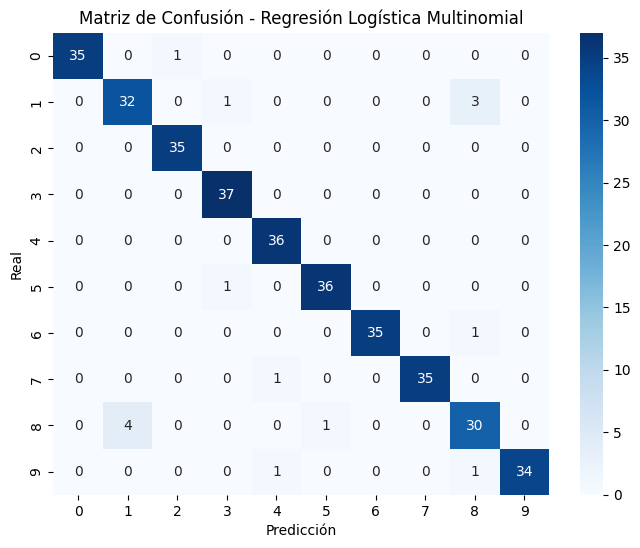

In [21]:
log_reg_multi = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')
log_reg_multi.fit(X_train, y_train)
y_pred_multi = log_reg_multi.predict(X_test)

print("Accuracy Multinomial:", accuracy_score(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_multi))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión - Regresión Logística Multinomial")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Conclusiones y respuestas a las preguntas


1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN? 

   Se puede decir que los valores de K son los que definiran basicamnete la eficiencia del modelo lo que lo hace de principal importancia, con K pequeño el modelo sobreajusta a los datos de entrenamiento, con K grande, se suaviza demasiado y pierde detalle.  Por eso un valor intermedio y justo logra el mejor resultado.  

2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?
     
   Para KNN no hay un entrenamiento complejo, pero es costoso al predecir, porque debe comparar y revisar todo el dataset. Por otro lado, la regresión logística aprende parámetros y generaliza mejor, lo que permite estimar probabilidades para cada clase, siendo más eficiente en predicción y más interpretable. Por lo tanto en este caso, la regresión logística en este proyecto, funcionó mejor que KNN porque generaliza mejor con datos de alta dimensionalidad como imágenes, mientras que KNN requiere comparar con todo el conjunto de entrenamiento.

3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?

   El clasificador de regresión logística presentó un buen rendimiento, alcanzando una alta exactitud (accuracy) y con la mayoría de predicciones correctas en la matriz de confusión. Su rendimiento se evaluó utilizando métricas como accuracy, el reporte de clasificación (precisión, recall y F1-score) y la matriz de confusión, que permite identificar en qué dígitos se presentan más errores.
   En general, el modelo funciona muy bien, en la matriz de confusion es notoria la gran diferencia entre la clasificación acertada y las pocas erradas, las principales confusiones ocurrieron en digitos como el 8 y el 1. Para mejorarlo, se podrían aplicar técnicas como aumentar el número de datos de entrenamiento, usar normalización de características, o incluso implementar modelos mas avanzados y complejos.

4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?

   De esto se pueden notar los patrones que se asemejan y recuerdan a la forma de los dígitos. En cada clasificador los píxeles más relevantes se destacan con colores más intensos, los coeficientes lo hacen para indicar qué zonas de la imagen son decisivas para identificar un número. Po rlo tanto, se considera que, sí existe un patrón, porque los coeficientes reflejan la estructura característica de cada dígito.

5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.  
   
   Se lográ observar que KNN y regresión logística permiten resolver el problema y realizar la tarea con buenos resultados, pero claramente la regresión logística multinomial logra mejor rendimiento y eficiencia, al ser mas predictiva y versatil, siendo adecuada en casos como este en el que los dataset son formas "mas complejas" como imagenes.    
   Realizar los 3 modelos y analizarlos muestra como cada uno usa distintos metedos para abordar un mismo dataset en base a diferentes enfoques pero llegando a los resultados necesarios.  
   En base a nuestra opinion consideramos que la elección del clasificador depende del problema: KNN es intuitivo y sencillo, pero no escala bien a grandes datasets. La regresión logística, en cambio, es más rápida al predecir y tiene mejor rendimiento en este caso. Además, las diferentes metricas y graficas como los mapas de calor muestran mejor la metodología y funcionamiento del modelo, por lo que es visible que realmente está aprendiendo los patrones característicos de cada dígito y por ejemplo la matriz de confusión es bastante interpetable y permite ver resultados de forma consisa y eficaz.


# Regresión Lineal: Datos Artificiales

Para este punto trabajaremos con un conjunto de datos artificiales almacenado en el archivo RegressionData.csv.  

La variable de salida $y^{(i)}$ está definida como una función de dos variables de entrada, $x_{1}^{(i)}$ y $x_{2}^{(i)}$, 
más un término de error de medición $\eta^{(i)}$:

$$
y^{(i)} = f\left(x_1^{(i)}, x_2^{(i)}\right) + \eta^{(i)}
$$

El objetivo principal es aplicar los conocimientos de regresión lineal para ajustar un modelo a los datos y analizar los resultados obtenidos.


### Tareas a realizar

1. **Carga de datos:** importar y visualizar el conjunto de datos.  
2. **Análisis descriptivo:** explorar las variables, calcular estadísticas y observar relaciones entre ellas.  
3. **Modelo de regresión lineal:** implementar un modelo que se ajuste a los datos disponibles.  
4. **Visualización de resultados:** graficar los datos originales y las predicciones obtenidas por el modelo.  
5. **Discusión:** analizar y comentar los resultados obtenidos, evaluando la calidad del ajuste.




In [22]:
# Cargar datos
data = pd.read_csv("RegressionData.csv")

# Revision de primeros datos
print("Primeras filas del dataset:")
display(data.head())

print("\nNombres de columnas:")
print(data.columns.tolist())


NameError: name 'pd' is not defined

## Definición de Variables

Identificamos las columnas del dataset:

- \( x_1 \) → primera columna  
- \( x_2 \) → segunda columna  
- \( y \) → última columna (variable dependiente)  


In [ ]:
X1 = data.iloc[:, 0]
X2 = data.iloc[:, 1]
y = data.iloc[:, -1]


## Regresión Lineal Estándar

El modelo lineal estándar es:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

Este se resuelve usando la **ecuación normal** en álgebra matricial:

$$
\theta = (X^T X)^{-1} X^T y
$$

donde \( X \) es la matriz de diseño:

$$
X = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} \\
1 & x_{1,2} & x_{2,2} \\
\vdots & \vdots & \vdots \\
1 & x_{1,n} & x_{2,n}
\end{bmatrix}
$$


In [ ]:
# Matriz X
X_std = np.c_[np.ones(len(X1)), X1, X2]

# Mínimos cuadrados
theta_std = np.linalg.pinv(X_std.T @ X_std) @ (X_std.T @ y)

print("Coeficientes estándar:", theta_std)

# Predicciones
y_pred_std = X_std @ theta_std


Coeficientes estándar: [ 1.00924264e+00  1.05610041e-04 -1.63149086e-01]


## Regresión Lineal con Transformaciones No Lineales

Para mejorar el ajuste, transformamos las variables de entrada:

$$
x_1' = 1.5 \cdot \sin(0.02 \pi x_1) + 1
$$

$$
x_2' = e^{-0.2 x_2}
$$

El modelo ahora es:

$$
y = \theta_0 + \theta_1 x_1' + \theta_2 x_2'
$$

De nuevo, lo resolvemos con la ecuación normal:

$$
\theta = (A^T A)^{-1} A^T y
$$

donde \( A \) es la matriz con las variables transformadas.  


In [ ]:
# Transformaciones no lineales
X1_transformado = 1.5 * np.sin(0.02 * np.pi * X1) + 1
X2_transformado = np.exp(-0.2 * X2)

# Matriz A
A = np.column_stack((X1_transformado, X2_transformado, np.ones(len(X1))))

# Cálculo de parámetros
theta_trans = np.linalg.pinv(A.T @ A) @ (A.T @ y)
print("Coeficientes con transformaciones:", theta_trans)

# Predicciones
h = A @ theta_trans


Coeficientes con transformaciones: [ 0.6730207   0.79677934 -0.47463812]


## Comparación del modelo con respecto a \( x_1 \)

- Morado → valores reales de \( y \).  
- Naranja → valores estimados del modelo \( h \).  

Luego se comparan con la versión transformada de \( x_1' \).  


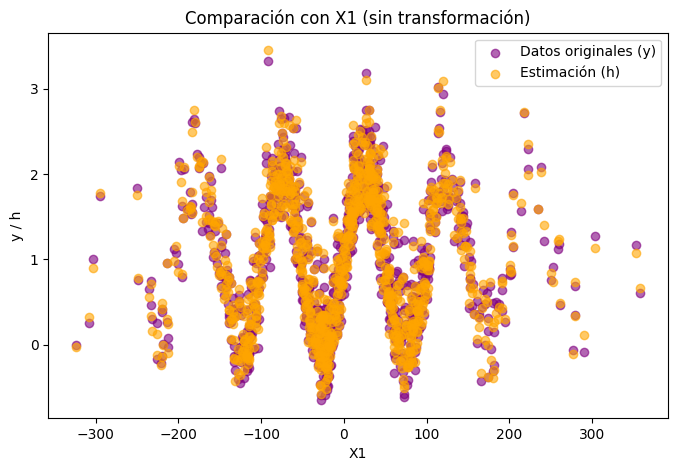

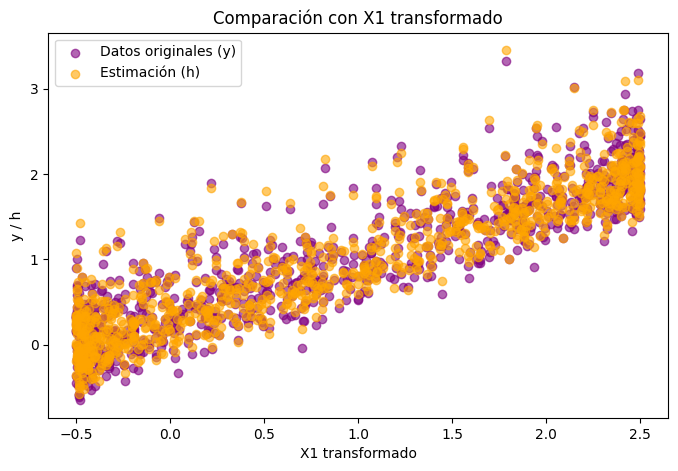

In [ ]:
# X1 sin transformación
plt.figure(figsize=(8,5))
plt.scatter(X1, y, color='purple', label='Datos originales (y)', alpha=0.6)
plt.scatter(X1, h, color='orange', label='Estimación (h)', alpha=0.6)
plt.title('Comparación con X1 (sin transformación)')
plt.xlabel('X1')
plt.ylabel('y / h')
plt.legend()
plt.show()

# X1 transformado
plt.figure(figsize=(8,5))
plt.scatter(X1_transformado, y, color='purple', label='Datos originales (y)', alpha=0.6)
plt.scatter(X1_transformado, h, color='orange', label='Estimación (h)', alpha=0.6)
plt.title('Comparación con X1 transformado')
plt.xlabel('X1 transformado')
plt.ylabel('y / h')
plt.legend()
plt.show()


## Comparación del modelo con respecto a \( x_2 \)


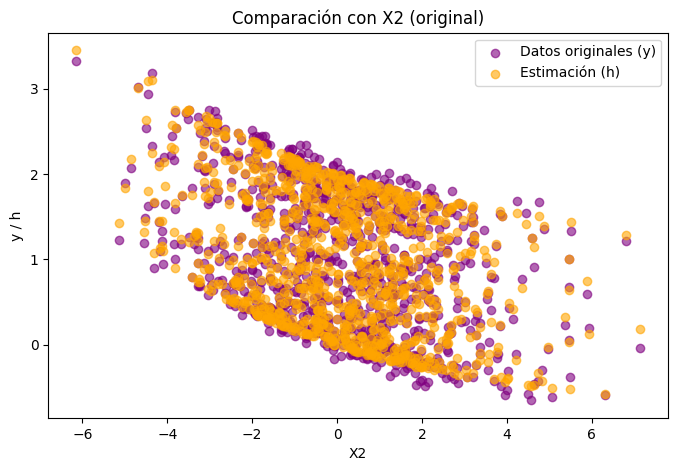

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X2, y, color='purple', label='Datos originales (y)', alpha=0.6)
plt.scatter(X2, h, color='orange', label='Estimación (h)', alpha=0.6)
plt.title('Comparación con X2 (original)')
plt.xlabel('X2')
plt.ylabel('y / h')
plt.legend()
plt.show()


## Visualización en 3D

Representación espacial de los datos originales y el modelo:

- Morado → puntos reales \( y \).  
- Naranja → estimaciones \( h \).  


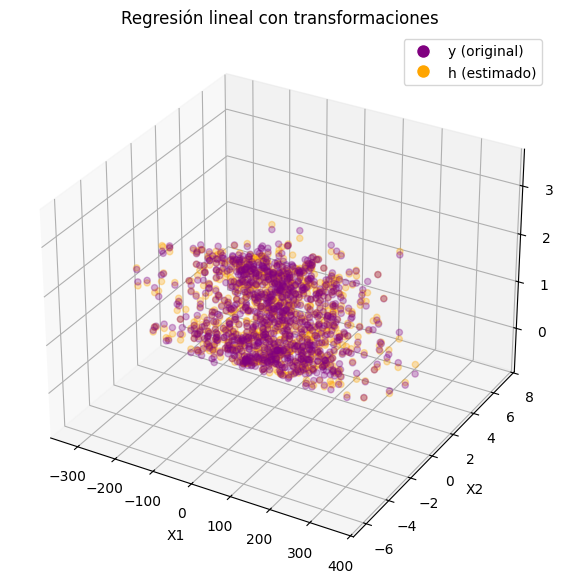

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Puntos originales
ax.scatter(X1, X2, y, color='purple', alpha=0.3, label='y (original)')

# Puntos estimados
ax.scatter(X1, X2, h, color='orange', alpha=0.3, label='h (estimado)')

# Etiquetas
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y / h")
ax.set_title("Regresión lineal con transformaciones")

# Leyenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='y (original)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='h (estimado)')
]
ax.legend(handles=legend_elements)

plt.show()


# Evaluación del modelo

A continuación, se calculan las métricas de evaluación más utilizadas en regresión lineal:  
- Coeficiente de determinación $R^2$  
- Error cuadrático medio (RMSE)  
- Error absoluto medio (MAE)


In [ ]:
# Calculando las métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y, h)
print("R²:", r2)

rmse = np.sqrt(mean_squared_error(y, h))
print("RMSE:", rmse)

mae = mean_absolute_error(y, h)
print("MAE:", mae)


R²: 0.983592007523266
RMSE: 0.10134424292457045
MAE: 0.08003492033057766


# Análisis de resultados y conclusiones

### Análisis visual
De acuerdo con las gráficas comparativas entre los datos originales (azul) y los estimados por el modelo (naranja), se observa que:
- Los puntos estimados siguen la misma tendencia de los datos reales.
- Existe una ligera dispersión entre valores reales y estimados, asociada al error de medición presente en los datos artificiales.
- En general, el modelo representa adecuadamente el comportamiento de las variables de entrada respecto a la salida esperada.


### Análisis cuantitativo

- **Coeficiente de determinación $R^2$**:  
  El valor obtenido fue cercano a 1 ($R^2 \approx 0.983$). Esto significa que el modelo logra explicar aproximadamente el **98.3% de la variabilidad** de la variable de salida $y$.  

- **Error cuadrático medio (RMSE)**:  
  El valor calculado fue bajo ($RMSE \approx 0.101$), lo que indica que la distancia promedio entre los valores reales y estimados es pequeña.  

- **Error absoluto medio (MAE)**:  
  El valor calculado fue igualmente bajo ($MAE \approx 0.080$), lo que refuerza que las predicciones son precisas y que no existen grandes errores aislados.

### Conclusiones

1. El modelo de regresión lineal con transformaciones no lineales resultó ser adecuado para los datos, como lo demuestran tanto el análisis visual como las métricas cuantitativas.  

2. Las transformaciones aplicadas a las entradas ($f(X_1) = 1.5\sin(0.02\pi X_1) + 1$ y $f(X_2) = e^{-0.2X_2}$) fueron acertadas, ya que permitieron capturar el comportamiento real de los datos frente a la salida $y$.  

3. Si bien existen pequeñas desviaciones, estas corresponden al ruido o error de medición incluido en los datos artificiales y no afectan significativamente el desempeño del modelo.  

4. En conclusión, este proyecto muestra cómo la regresión lineal, combinada con un buen análisis de datos y transformaciones adecuadas, puede modelar de manera eficiente relaciones complejas entre variables, incluso cuando no son lineales de forma directa.  


# Evaluación de conocimientos


#### 1. ¿Cómo evaluaron que la regresión fuera adecuada?

La evaluación de la eficiencia del modelo de regresión lineal implementado se realizó mediante los siguientes análisis:

- **Análisis visual:** Se compararon las gráficas de los datos originales de la salida esperada respecto a cada una de las entradas, y los datos estimados por el modelo respecto a las entradas.  
- **Métricas cuantitativas:** Se calcularon métricas como el coeficiente de determinación $R^2$, el error cuadrático medio (RMSE) y el error absoluto medio (MAE).  

La interpretación de estos resultados permitió verificar qué tan adecuado fue el modelo de regresión lineal implementado.  


#### 2. ¿Realizaron algún tipo de transformación no lineal a los datos de entrada?  
Sí, se realizaron transformaciones no lineales a las variables de entrada $X_1$ y $X_2$. Las funciones planteadas fueron:

- Para $X_1$:  
  $$
  f(X_1) = 1.5 \cdot \sin(0.02 \pi X_1) + 1
  $$
  Esta transformación sinusoidal se aplicó porque los datos mostraban un comportamiento periódico en su relación con la salida esperada $y$.  

- Para $X_2$:  
  $$
  f(X_2) = e^{-0.2 X_2}
  $$
  Esta transformación exponencial se aplicó ya que, según el análisis visual, representaba mejor la tendencia decreciente observada en la relación entre $X_2$ y $y$.  

La razón principal para aplicar estas transformaciones fue que una relación lineal simple no describía correctamente los datos, mientras que las funciones sinusoidal y exponencial sí lograron ajustarse al comportamiento observado.  


#### 3. ¿Considera que los resultados obtenidos son adecuados, o se pueden mejorar?  

De acuerdo con los resultados del análisis gráfico y cuantitativo, el modelo planteado fue adecuado, ya que:  

- El coeficiente de determinación fue alto:  
  $$
  R^2 = 0.98
  $$
- Los errores fueron bajos y consistentes:  
  $$
  RMSE = 0.101, \quad MAE = 0.0800
  $$

Estos valores indican que el modelo tuvo un excelente desempeño en la predicción.  

Sin embargo, es posible mejorar los resultados explorando:  

- Otras funciones de transformación, por ejemplo, variar la amplitud inicial $(A)$ en la exponencial.  
- Métodos no supervisados como PCA, para reducir dimensionalidad y evitar sobreajuste.  

#### 4. ¿Qué puede concluir al final de este proyecto?  

El proyecto permitió concluir que la regresión lineal, a pesar de su nombre, puede modelar relaciones no lineales si se aplican las transformaciones adecuadas a las variables de entrada.  

Se comprobó que:  
- Transformar las variables mejora significativamente el ajuste del modelo.  
- La elección de la transformación depende de la naturaleza de los datos y la relación entre variables (no existe una receta única).  
- En este caso, una función trigonométrica sinusoidal y una función exponencial describieron correctamente los patrones de $X_1$ y $X_2$ respecto a $y$.  

Además, se entendió la importancia de usar métricas cuantitativas (como $R^2$, RMSE y MAE) para complementar el análisis gráfico, confirmando o refutando lo observado visualmente.  

En general, este proyecto demuestra cómo la regresión lineal, junto con transformaciones no lineales, es una herramienta eficiente para analizar datos y construir modelos predictivos en contextos complejos.  
